In [106]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## 1. Аналіз чутливості параметрів (3 бали)

### Модель Мальтуса

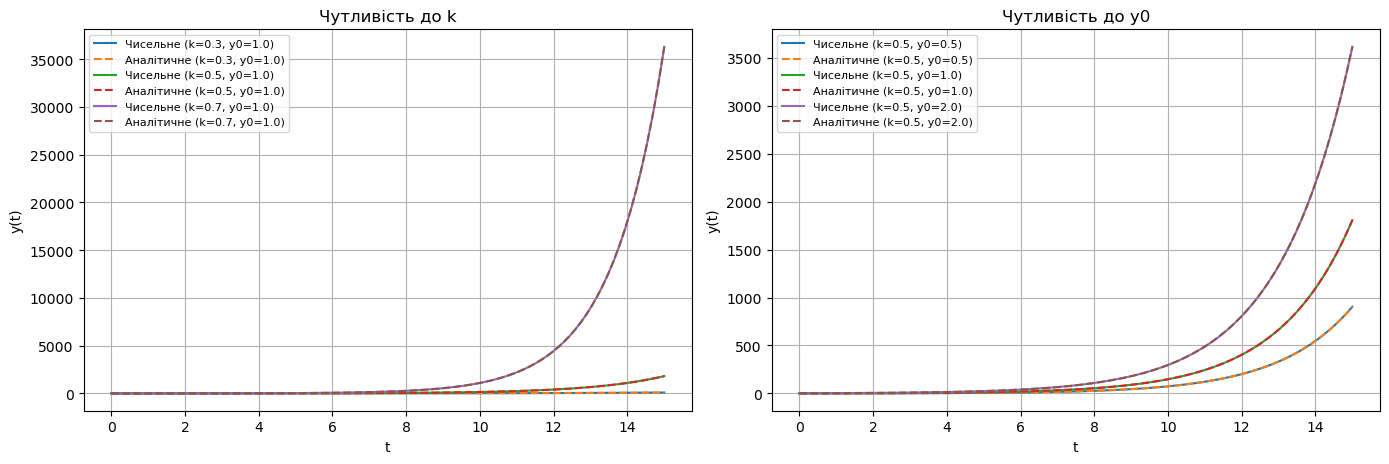

In [107]:
# Базові параметри
base_params = {"k": 0.5, "y0": 1.0}
# Часовий проміжок
T_SPAN = (0, 15)
T_EVAL = np.linspace(*T_SPAN, 100)

def malthus_model(t, y, k):
    return k * y

def analytical_solution(t, y0, k):
    return y0 * np.exp(k * t)

# Варіації параметрів
param_variations = {"k": [0.3, 0.5, 0.7], "y0": [0.5, 1.0, 2.0]}

# Побудова графіків
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for ax, (param, values) in zip(axes, param_variations.items()):
    for value in values:
        params = base_params.copy()
        params[param] = value
        sol = solve_ivp(malthus_model, T_SPAN, [params["y0"]], t_eval=T_EVAL, args=(params["k"],))
        analytical = analytical_solution(T_EVAL, params["y0"], params["k"])
        label = f"k={params['k']}, y0={params['y0']}"
        ax.plot(sol.t, sol.y[0], label=f"Чисельне ({label})")
        ax.plot(T_EVAL, analytical, '--', label=f"Аналітичне ({label})")
    
    ax.set_title(f"Чутливість до {param}")
    ax.set_xlabel("t")
    ax.set_ylabel("y(t)")
    ax.legend(fontsize=8)
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Логістична модель

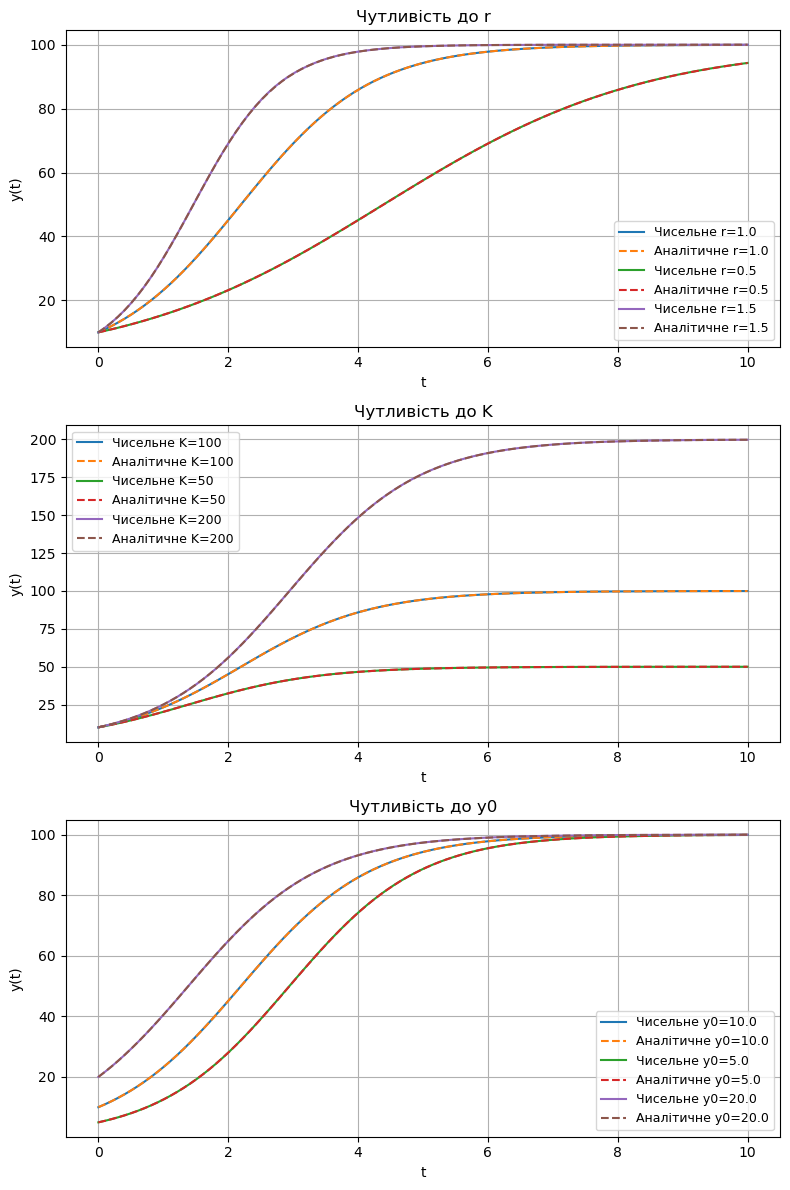

In [108]:
# Логістична модель
def logistic_model(t, y, r, K):
    return r * y * (1 - y / K)

# Функція розв’язання рівняння
def solve_logistic(y0, r, K, t_span, t_eval):
    sol = solve_ivp(logistic_model, t_span, [y0], args=(r, K), t_eval=t_eval)
    analytical_sol = K / (1 + ((K - y0) / y0) * np.exp(-r * t_eval))
    return sol.t, sol.y[0], analytical_sol

# Оптимізована функція побудови графіків
def plot_solutions(r_values, K_values, y0_values, t_span=(0, 10), t_points=100):
    t_eval = np.linspace(*t_span, t_points)
    params = [
        ("Чутливість до r", r_values, lambda val: (val, base_K, base_y0)),
        ("Чутливість до K", K_values, lambda val: (base_r, val, base_y0)),
        ("Чутливість до y0", y0_values, lambda val: (base_r, base_K, val))
    ]

    _, axs = plt.subplots(len(params), 1, figsize=(8, 12))  

    for ax, (title, values, param_func) in zip(axs, params):
        for val in values:
            r, K, y0 = param_func(val)
            t, num_sol, ana_sol = solve_logistic(y0, r, K, t_span, t_eval)
            ax.plot(t, num_sol, label=f"Чисельне {title.split()[-1]}={val}")
            ax.plot(t_eval, ana_sol, '--', label=f"Аналітичне {title.split()[-1]}={val}")

        ax.set_title(title)
        ax.set_xlabel("t")
        ax.set_ylabel("y(t)")
        ax.legend(fontsize=9)
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# Вхідні параметри
r_values = [1.0, 0.5, 1.5]
K_values = [100, 50, 200]
y0_values = [10.0, 5.0, 20.0]
base_r, base_K, base_y0 = r_values[0], K_values[0], y0_values[0]

plot_solutions(r_values, K_values, y0_values)

### Модель Лотка–Вольтера

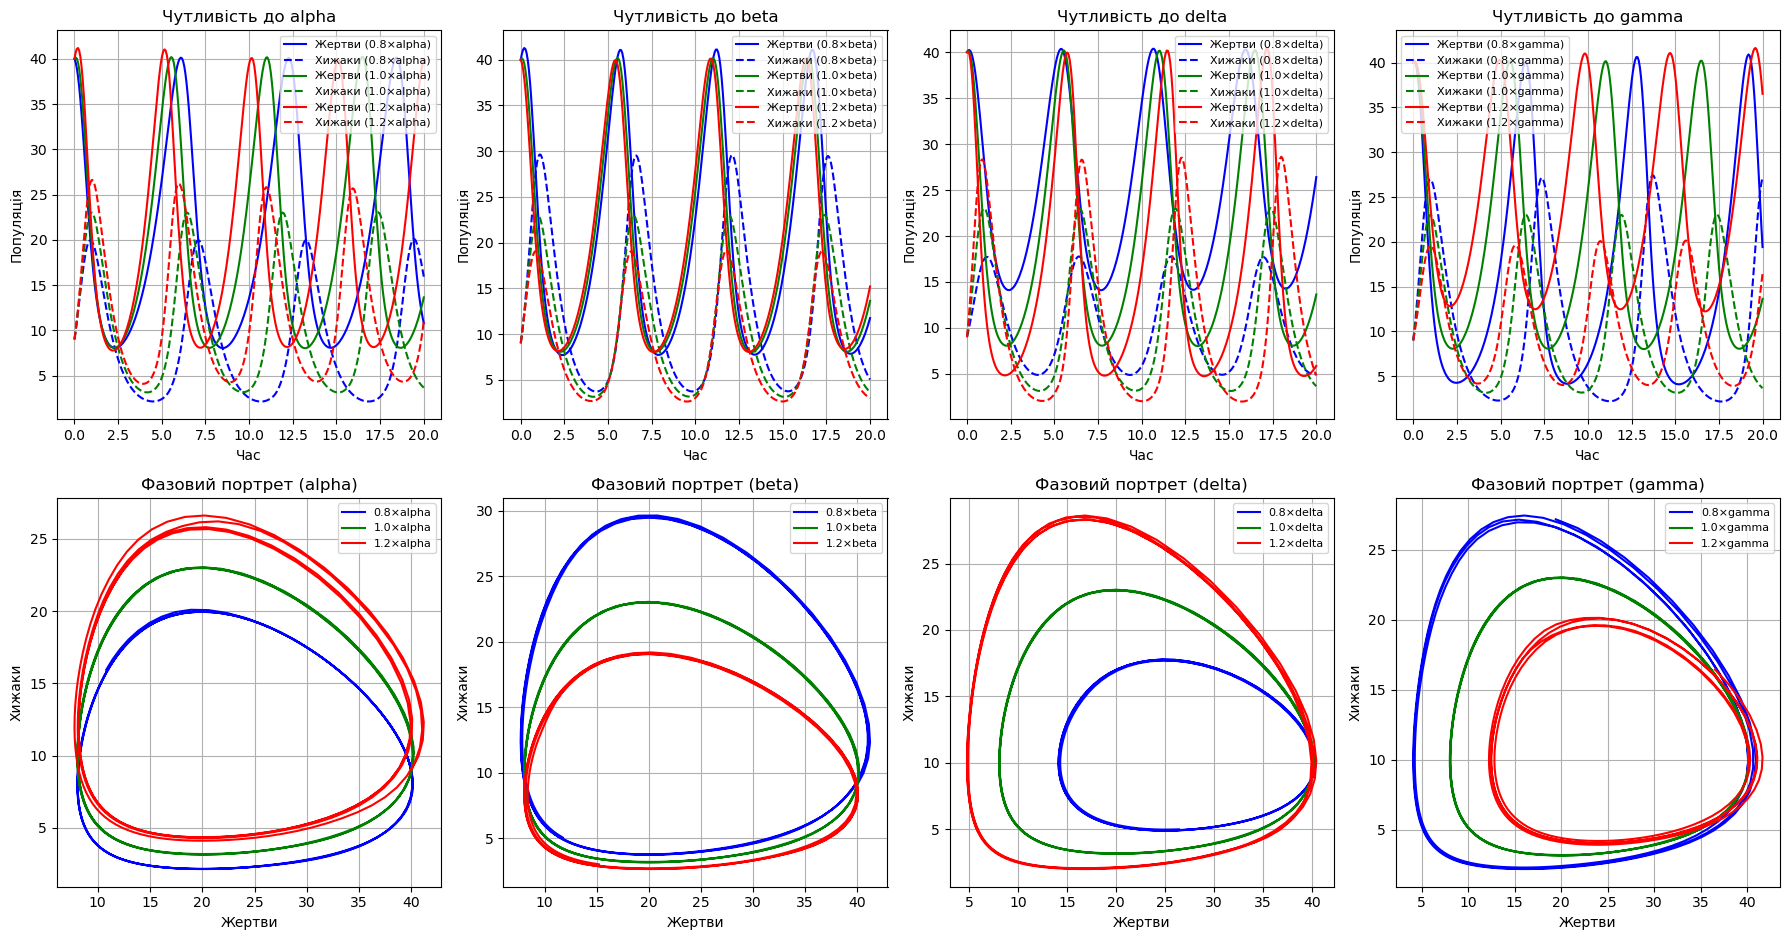

In [109]:
# Параметри моделі Лотка–Вольтера
base_params = {
    "alpha": 1.0, "beta": 0.1, "delta": 0.075, "gamma": 1.5
}

x0, y0 = 40.0, 9.0
t_span, t_eval = (0, 20), np.linspace(0, 20, 300)

# Функція Лотка–Вольтера
def lotka_volterra(t, z, alpha, beta, delta, gamma):
    x, y = z
    return [alpha * x - beta * x * y, delta * x * y - gamma * y]

# Варіації параметрів
param_variations = {
    "alpha": [0.8, 1.0, 1.2], "beta": [0.8, 1.0, 1.2],
    "delta": [0.8, 1.0, 1.2], "gamma": [0.8, 1.0, 1.2]
}

# Побудова графіків
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
colors = ['b', 'g', 'r']

for i, (param, factors) in enumerate(param_variations.items()):
    for j, factor in enumerate(factors):
        params = {key: val * (factor if key == param else 1) for key, val in base_params.items()}
        sol = solve_ivp(lotka_volterra, t_span, [x0, y0], t_eval=t_eval, args=tuple(params.values()))

        # Динаміка популяцій
        axes[0, i].plot(sol.t, sol.y[0], color=colors[j], linestyle='-', label=f"Жертви ({factor:.1f}×{param})")
        axes[0, i].plot(sol.t, sol.y[1], color=colors[j], linestyle='--', label=f"Хижаки ({factor:.1f}×{param})")

        # Фазовий портрет
        axes[1, i].plot(sol.y[0], sol.y[1], color=colors[j], label=f"{factor:.1f}×{param}")

    axes[0, i].set_title(f"Чутливість до {param}")
    axes[0, i].set_xlabel("Час")
    axes[0, i].set_ylabel("Популяція")
    axes[0, i].grid(True)
    axes[0, i].legend(fontsize=8)

    axes[1, i].set_title(f"Фазовий портрет ({param})")
    axes[1, i].set_xlabel("Жертви")
    axes[1, i].set_ylabel("Хижаки")
    axes[1, i].grid(True)
    axes[1, i].legend(fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

### Модель EOQ

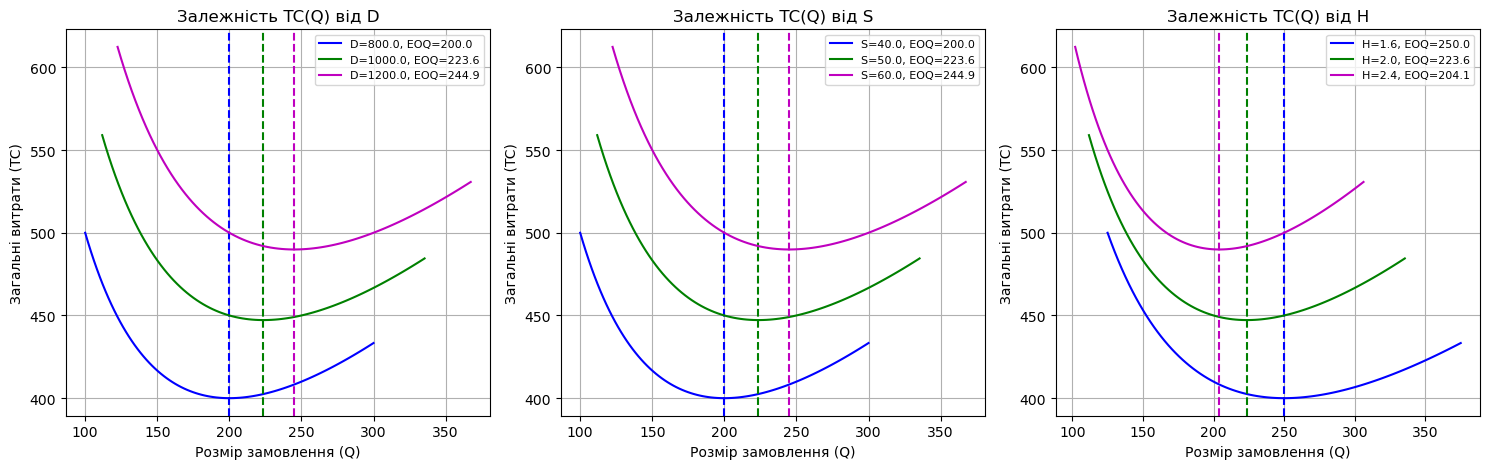

In [110]:
# Базові параметри
D, S, H = 1000, 50, 2

# Формули EOQ і загальних витрат
compute_eoq = lambda D, S, H: math.sqrt((2 * D * S) / H)
total_cost = lambda Q, D, S, H: (D / Q) * S + (Q / 2) * H

# Варіації параметрів
param_variations = {
    "D": [0.8 * D, D, 1.2 * D],
    "S": [0.8 * S, S, 1.2 * S],
    "H": [0.8 * H, H, 1.2 * H]
}

# Побудова графіків
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

colors = ['b', 'g', 'm']
for ax, (param, values), color in zip(axes, param_variations.items(), colors):
    for i, value in enumerate(values):
        params = {"D": D, "S": S, "H": H}
        params[param] = value

        eoq = compute_eoq(params["D"], params["S"], params["H"])
        Q_values = np.linspace(eoq * 0.5, eoq * 1.5, 100)
        TC_values = [total_cost(Q, params["D"], params["S"], params["H"]) for Q in Q_values]

        ax.plot(Q_values, TC_values, label=f"{param}={value:.1f}, EOQ={eoq:.1f}", color=colors[i])
        ax.axvline(eoq, color=colors[i], linestyle="--")

    ax.set_title(f"Залежність TC(Q) від {param}")
    ax.set_xlabel("Розмір замовлення (Q)")
    ax.set_ylabel("Загальні витрати (TC)")
    ax.legend(fontsize=8)
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Модель попиту і пропозиції

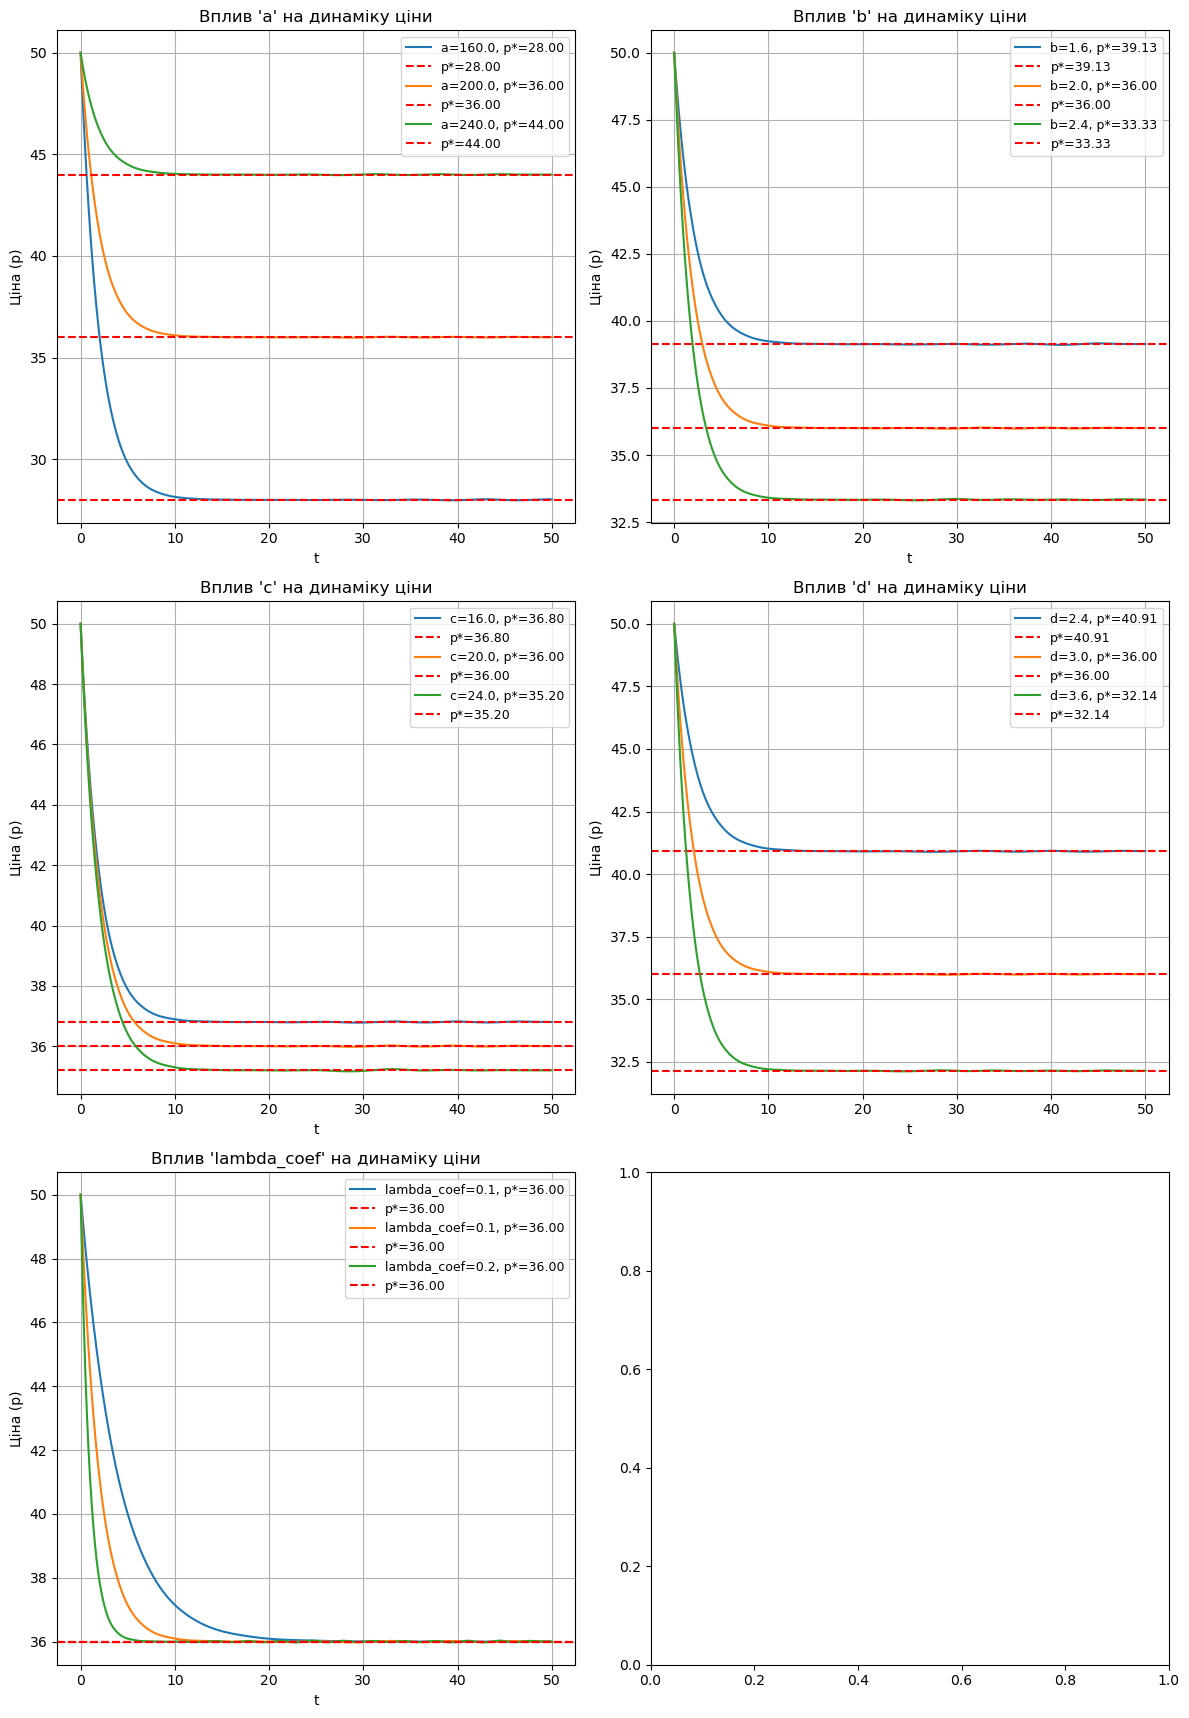

In [111]:
# Базові параметри моделі попиту і пропозиції
base_params = {
    "a": 200, "b": 2, "c": 20, "d": 3, 
    "lambda_coef": 0.1, "p0": 50
}

# Часовий проміжок моделювання
t_eval = np.linspace(0, 50, 300)

# Функції попиту та пропозиції
demand = lambda p, a, b: a - b * p
supply = lambda p, c, d: c + d * p

# Диференціальне рівняння для динаміки ціни
def price_dynamics(t, p, a, b, c, d, lambda_coef):
    return [lambda_coef * (demand(p[0], a, b) - supply(p[0], c, d))]

# Діапазон змін параметрів
param_variations = {
    "a": [0.8, 1, 1.2], "b": [0.8, 1, 1.2], 
    "c": [0.8, 1, 1.2], "d": [0.8, 1, 1.2], 
    "lambda_coef": [0.5, 1, 2]
}

fig, axes = plt.subplots(3, 2, figsize=(12, 18))
axes = axes.flatten()

for i, (param, factors) in enumerate(param_variations.items()):
    ax = axes[i]
    for factor in factors:
        params = base_params.copy()
        params[param] *= factor

        # Розрахунок рівноважної ціни для кожного набору параметрів
        p_eq = (params["a"] - params["c"]) / (params["b"] + params["d"])

        # Чисельне рішення
        solution = solve_ivp(
            price_dynamics, (0, 50), [params["p0"]], t_eval=t_eval,
            args=(params["a"], params["b"], params["c"], params["d"], params["lambda_coef"])
        )

        # Побудова графіка
        label = f"{param}={params[param]:.1f}, p*={p_eq:.2f}"
        ax.plot(solution.t, solution.y[0], label=label)
        
        ax.axhline(y=p_eq, color='r', linestyle='--', label=f'p*={p_eq:.2f}')

    ax.set_title(f"Вплив '{param}' на динаміку ціни")
    ax.set_xlabel("t")
    ax.set_ylabel("Ціна (p)")
    ax.legend(fontsize=9)
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Модель прогнозування інвестицій

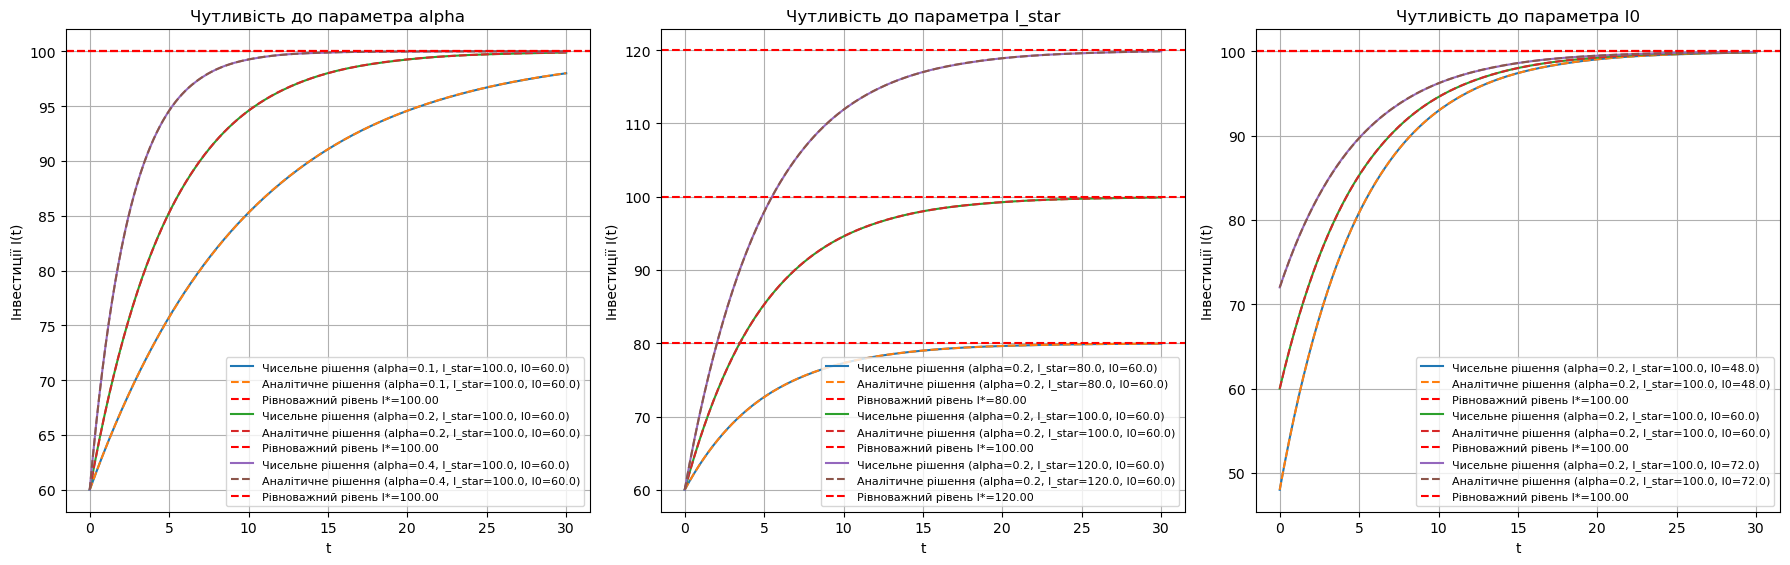

In [112]:
# Базові параметри моделі прогнозування інвестицій
base_params = {"alpha": 0.2, "I_star": 100.0, "I0": 60.0 }
t_span = (0, 30)
t_eval = np.linspace(t_span[0], t_span[1], 300)

# Диференціальне рівняння для моделі інвестицій
def investment_model(t, I, alpha, I_star):
    return [alpha * (I_star - I[0])]

# Аналітичне рішення
def analytical_investment(t, I0, I_star, alpha):
    return I_star - (I_star - I0) * np.exp(-alpha * t)

# Діапазони змін параметрів
param_variations = {
    "alpha": [0.5 * base_params["alpha"], base_params["alpha"], 2 * base_params["alpha"]],
    "I_star": [0.8 * base_params["I_star"], base_params["I_star"], 1.2 * base_params["I_star"]],
    "I0": [0.8 * base_params["I0"], base_params["I0"], 1.2 * base_params["I0"]]
}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, (param, values) in zip(axes, param_variations.items()):
    for value in values:
        params = base_params.copy()
        params[param] = value

        # Чисельне рішення
        solution = solve_ivp(
            investment_model, t_span, [params["I0"]], t_eval=t_eval,
            args=(params["alpha"], params["I_star"])
        )

        # Аналітичне рішення
        analytical_solution = analytical_investment(t_eval, params["I0"], params["I_star"], params["alpha"])

        legend_text = f"alpha={params['alpha']}, I_star={params['I_star']}, I0={params['I0']}"

        ax.plot(solution.t, solution.y[0], label=f"Чисельне рішення ({legend_text})")
        ax.plot(t_eval, analytical_solution, '--', label=f"Аналітичне рішення ({legend_text})")
        ax.axhline(y=params["I_star"], color='r', linestyle='--', label=f'Рівноважний рівень I*={params["I_star"]:.2f}')

    ax.set_title(f"Чутливість до параметра {param}")
    ax.set_xlabel("t")
    ax.set_ylabel("Інвестиції I(t)")
    ax.legend(fontsize=8)
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Модель міграції

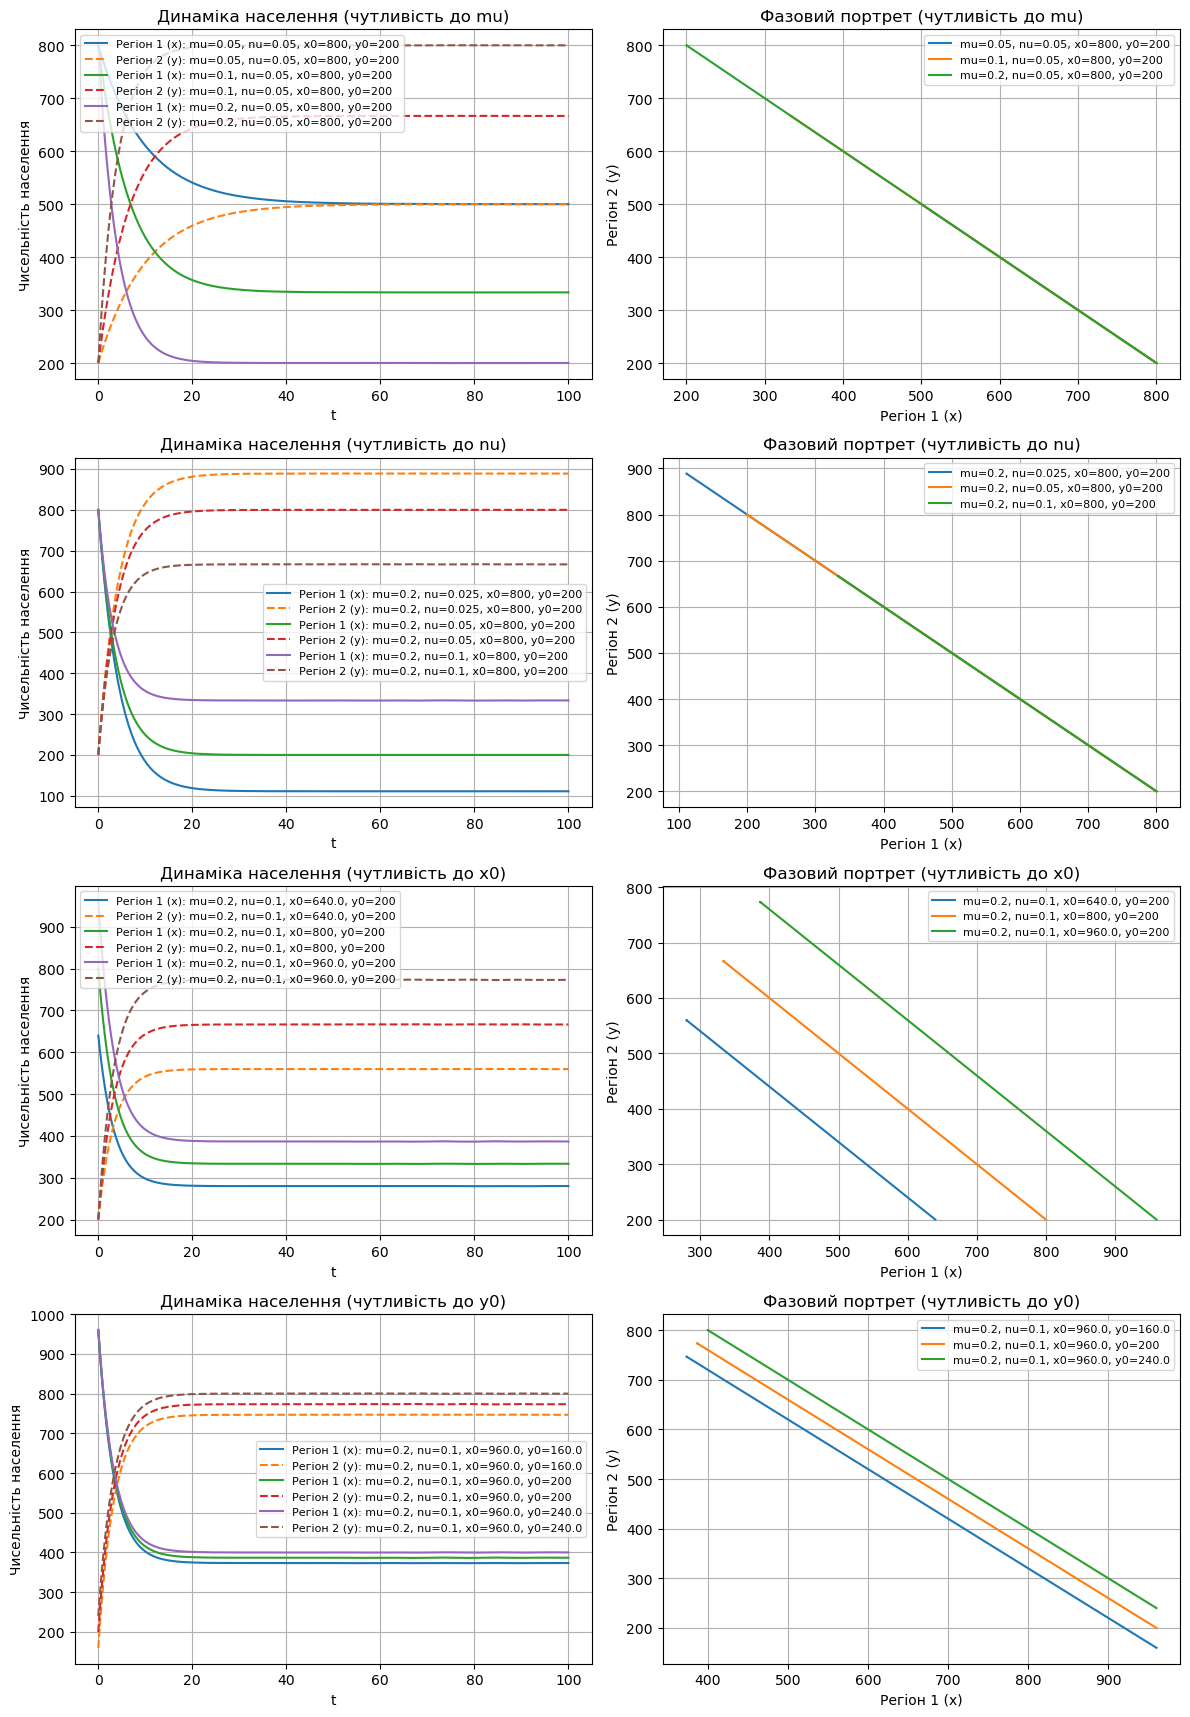

In [113]:
# Базові параметри моделі міграції
base_params = {"mu": 0.1, "nu": 0.05, "x0": 800, "y0": 200}
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 300)

# Система диференціальних рівнянь для моделі міграції
def migration_model(t, populations, mu, nu):
    x, y = populations
    dxdt = -mu * x + nu * y
    dydt = mu * x - nu * y
    return [dxdt, dydt]

param_variations = {
    "mu": [0.5 * base_params["mu"], base_params["mu"], 2 * base_params["mu"]],
    "nu": [0.5 * base_params["nu"], base_params["nu"], 2 * base_params["nu"]],
    "x0": [0.8 * base_params["x0"], base_params["x0"], 1.2 * base_params["x0"]],
    "y0": [0.8 * base_params["y0"], base_params["y0"], 1.2 * base_params["y0"]]
}

def setup_plot(ax, title, xlabel, ylabel, legend_fontsize=8):
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(fontsize=legend_fontsize)
    ax.grid(True)

fig, axes = plt.subplots(4, 2, figsize=(12, 18))
for i, (param, values) in enumerate(param_variations.items()):
    ax_time = axes[i, 0]
    ax_phase = axes[i, 1]

    for value in values:
        base_params[param] = value
        initial_conditions = [base_params["x0"], base_params["y0"]]

        # Чисельне рішення
        solution = solve_ivp(
            migration_model, t_span, initial_conditions, t_eval=t_eval,
            args=(base_params["mu"], base_params["nu"])
        )

        legend_text = f"mu={base_params['mu']}, nu={base_params['nu']}, x0={base_params['x0']}, y0={base_params['y0']}"

        ax_time.plot(solution.t, solution.y[0], label=f"Регіон 1 (x): {legend_text}")
        ax_time.plot(solution.t, solution.y[1], linestyle='--', label=f"Регіон 2 (y): {legend_text}")

        ax_phase.plot(solution.y[0], solution.y[1], label=legend_text)

    setup_plot(ax_time, f"Динаміка населення (чутливість до {param})", "t", "Чисельність населення")
    setup_plot(ax_phase, f"Фазовий портрет (чутливість до {param})", "Регіон 1 (x)", "Регіон 2 (y)")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Модель соціальної динаміки

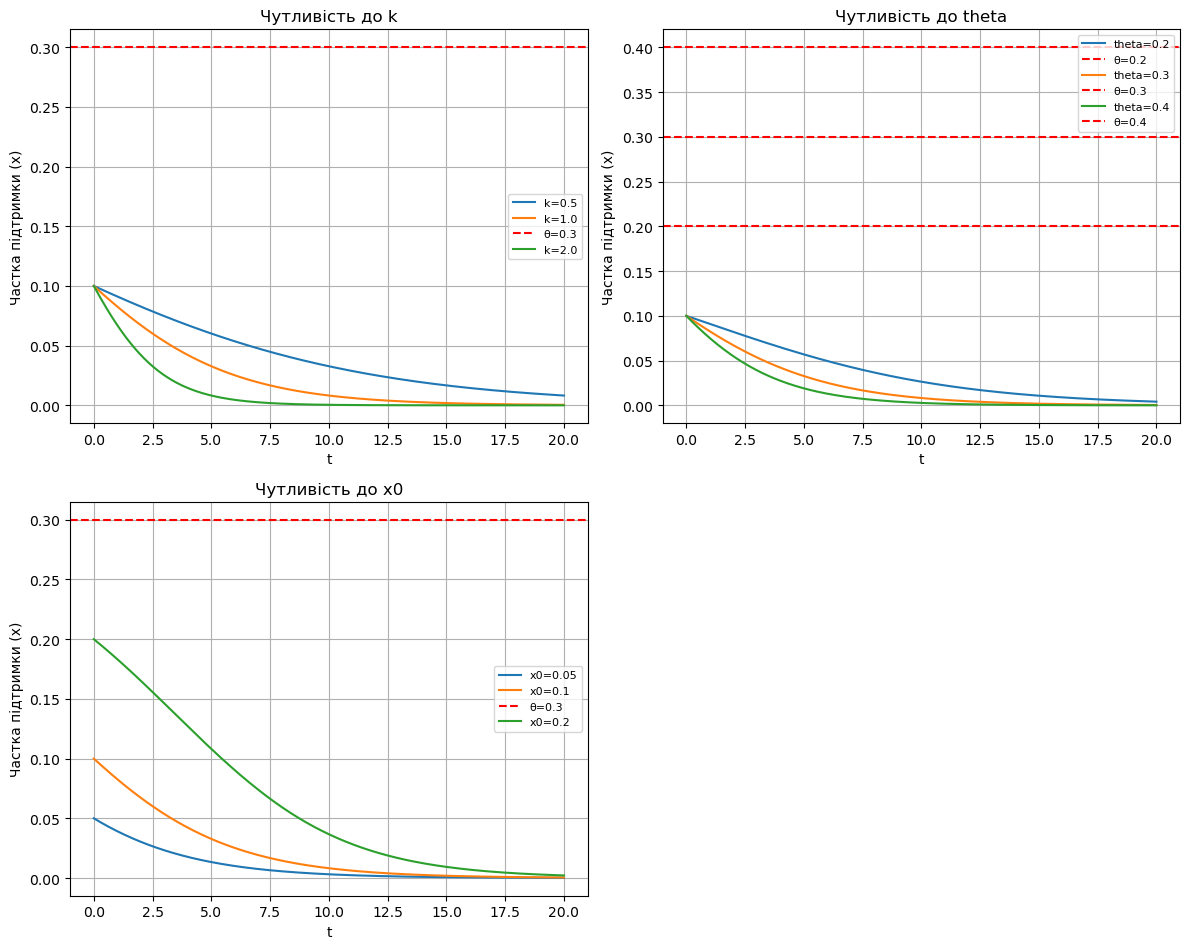

In [114]:
# Базові параметри моделі
base_params = {"k": 1.0, "theta": 0.3, "x0": 0.1}
t_span, t_eval = (0, 20), np.linspace(0, 20, 300)

# Функція для моделювання соціальної динаміки
def social_dynamics(t, x, k, theta):
    return [k * x[0] * (1 - x[0]) * (x[0] - theta)]

# Діапазони параметрів
param_variations = {
    "k": [0.5, 1.0, 2.0],
    "theta": [0.2, 0.3, 0.4],
    "x0": [0.05, 0.1, 0.2],
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (param, values) in enumerate(param_variations.items()):
    ax = axes[i]
    for value in values:
        params = base_params.copy()
        params[param] = value
        solution = solve_ivp(
            social_dynamics, t_span, [params["x0"]], t_eval=t_eval,
            args=(params["k"], params["theta"])
        )
        ax.plot(solution.t, solution.y[0], label=f"{param}={value}")

        if param == "theta":
            ax.axhline(y=value, color='r', linestyle='--', label=f'θ={value}')
        elif value == base_params[param]:
            ax.axhline(y=params["theta"], color='r', linestyle='--', label=f'θ={params["theta"]}')

    ax.set_title(f"Чутливість до {param}")
    ax.set_xlabel("t")
    ax.set_ylabel("Частка підтримки (x)")
    ax.legend(fontsize=8)
    ax.grid(True)

fig.delaxes(axes[3])
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 2. Модифікація моделей (2 бали)

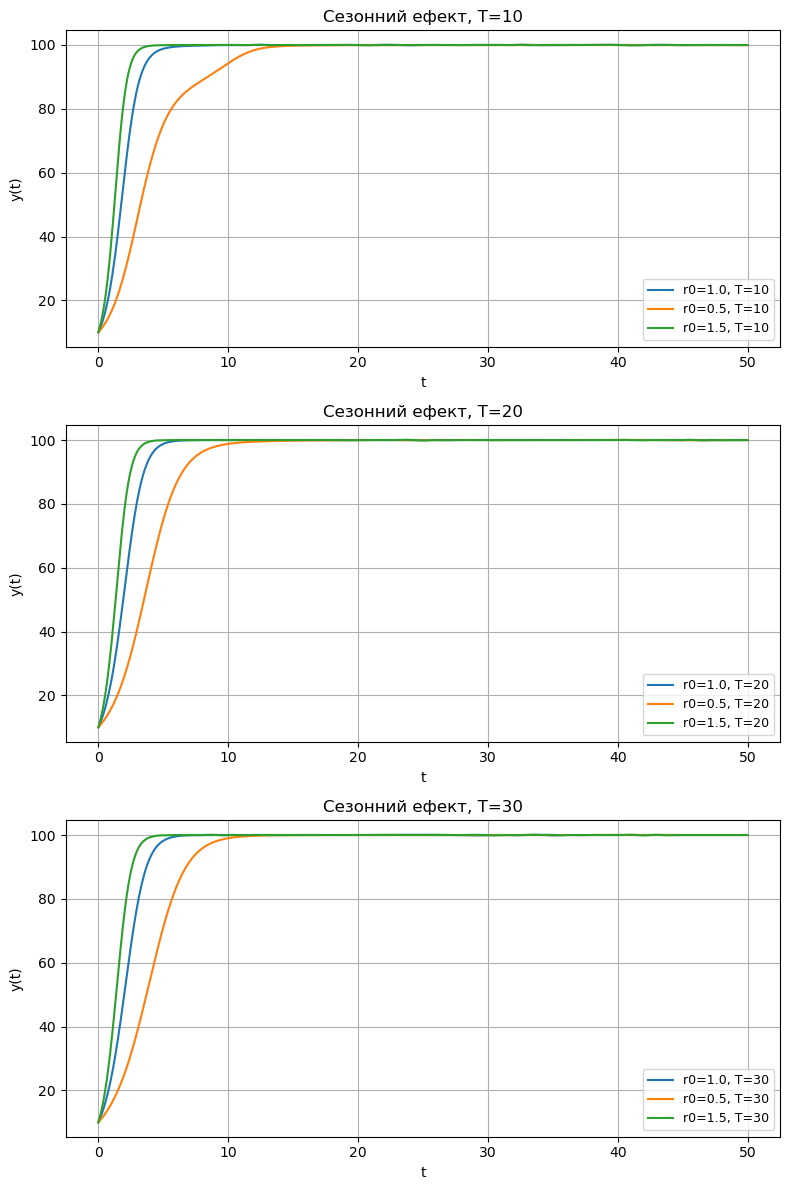

In [115]:
# Логістична модель з сезонною залежністю r
def logistic_model_seasonal(t, y, r0, K, T):
    r_t = r0 * (1 + 0.5 * np.sin(2 * np.pi * t / T))
    return r_t * y * (1 - y / K)

# Функція розв’язання рівняння
def solve_logistic_seasonal(y0, r0, K, T, t_span, t_eval):
    sol = solve_ivp(logistic_model_seasonal, t_span, [y0], args=(r0, K, T), t_eval=t_eval)
    return sol.t, sol.y[0]

# Функція для побудови графіків
def plot_seasonal_solutions(r0_values, T_values, t_span=(0, 50), t_points=500):
    t_eval = np.linspace(*t_span, t_points)
    _, axs = plt.subplots(len(T_values), 1, figsize=(8, 12))

    for ax, T in zip(axs, T_values):
        for r0 in r0_values:
            t, num_sol = solve_logistic_seasonal(base_y0, r0, base_K, T, t_span, t_eval)
            ax.plot(t, num_sol, label=f"r0={r0}, T={T}")

        ax.set_title(f"Сезонний ефект, T={T}")
        ax.set_xlabel("t")
        ax.set_ylabel("y(t)")
        ax.legend(fontsize=9)
        ax.grid(True)

    plt.tight_layout()
    plt.show()

r0_values = [1.0, 0.5, 1.5]
K_values = [100]
y0_values = [10.0]
T_values = [10, 20, 30]
base_r0, base_K, base_y0 = r0_values[0], K_values[0], y0_values[0]
plot_seasonal_solutions(r0_values, T_values)

## 3. Додаткове завдання (на +2 бали)

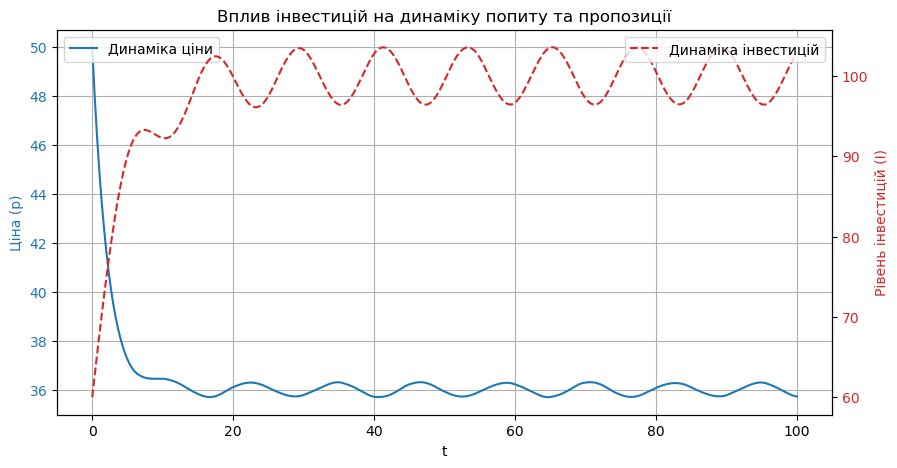

In [116]:
# Базові параметри
base_params = {
    "a": 200, "b": 2, "c": 20, "d": 3, 
    "lambda_coef": 0.1, "p0": 50,
    "alpha": 0.2, "I_star": 100.0, "I0": 60.0,
    "season_amp": 10, "season_freq": 2 * np.pi / 12  # річний цикл
}
t_eval = np.linspace(0, 100, 600)

# Функції попиту та пропозиції
demand = lambda p, a, b: a - b * p
supply = lambda p, c, d: c + d * p

# Функція зміни інвестицій із сезонним фактором
def investment_model(t, I, alpha, I_star, season_amp, season_freq):
    seasonal_component = season_amp * np.sin(season_freq * t)
    return [alpha * (I_star + seasonal_component - I[0])]

# Динаміка ціни з оновленою пропозицією через рівень інвестицій
def price_dynamics(t, y, a, b, d, lambda_coef, alpha, I_star, season_amp, season_freq):
    p, I = y
    seasonal_component = season_amp * np.sin(season_freq * t)
    I_new = I_star + seasonal_component + (I - I_star) * np.exp(-alpha * t)
    c = 0.2 * I_new
    dp_dt = lambda_coef * (demand(p, a, b) - supply(p, c, d))
    dI_dt = alpha * (I_star + seasonal_component - I)
    return [dp_dt, dI_dt]

# Початкові умови
initial_conditions = [base_params["p0"], base_params["I0"]]

# Чисельне рішення
solution = solve_ivp(
    price_dynamics, (0, 100), initial_conditions, t_eval=t_eval,
    args=(base_params["a"], base_params["b"], base_params["d"], base_params["lambda_coef"],
          base_params["alpha"], base_params["I_star"], base_params["season_amp"], base_params["season_freq"])
)

# Візуалізація результатів
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.set_xlabel("t")
ax1.set_ylabel("Ціна (p)", color="tab:blue")
ax1.plot(solution.t, solution.y[0], label="Динаміка ціни", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.legend(loc="upper left")
ax1.grid(True)

ax2 = ax1.twinx()
ax2.set_ylabel("Рівень інвестицій (I)", color="tab:red")
ax2.plot(solution.t, solution.y[1], label="Динаміка інвестицій", color="tab:red", linestyle="dashed")
ax2.tick_params(axis="y", labelcolor="tab:red")
ax2.legend(loc="upper right")

plt.title("Вплив інвестицій на динаміку попиту та пропозиції")
plt.show()

Дивні результати отримали. З падінням ціни зростає динаміка інвестицій))